In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Обучающая выборка
original_train = pd.read_csv('sample_data/heart_train.csv')
# Тестовая выборка
original_test = pd.read_csv('sample_data/heart_test.csv')

In [3]:
# Удалим дубликаты записей, если они присутствуют
train = original_train.drop_duplicates()
test = original_test.drop_duplicates()

In [4]:
# Первые 5 строк датасета
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
2,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
3,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
4,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1


In [5]:
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
1,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1
2,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
3,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
4,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [6]:
# Размер обучающего датасета - 1895 строк, 34 колонок
train.shape, test.shape

((243, 14), (60, 14))

In [7]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# Список колонок с типами данных 
# убедимся что типы данных одинаковы в обучающей и тестовых выборках
train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
test.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
# Проверим наличие пустых значений
train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
test.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### Вывод. Представленный набор данных не содержит пропусков ни в обучающей, ни в тестовой выборках.

# Построение графиков для понимания структуры данных

In [12]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
train['target'].unique()

array([0, 1], dtype=int64)

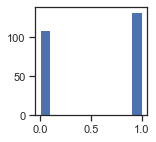

In [13]:
# Оценим дисбаланс классов для Target
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['target'])
plt.show()

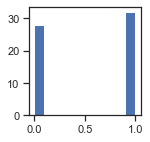

In [16]:
# Оценим дисбаланс классов для Target
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(test['target'])
plt.show()

In [17]:
train['target'].value_counts()

1    133
0    110
Name: target, dtype: int64

In [18]:
test['target'].value_counts()

1    32
0    28
Name: target, dtype: int64

In [22]:
# посчитаем дисбаланс классов
total = train.shape[0]
class_0, class_1 = train['target'].value_counts()
print('Класс 1 составляет {}%, а класс 0 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))


Класс 1 составляет 54.730000000000004%, а класс 0 составляет 45.269999999999996%.


##### Вывод: Дисбаланс классов практически отcутствует

In [24]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

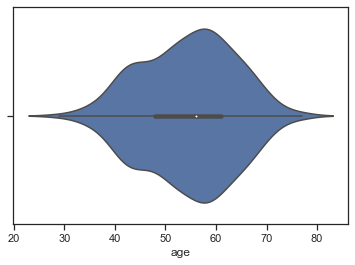

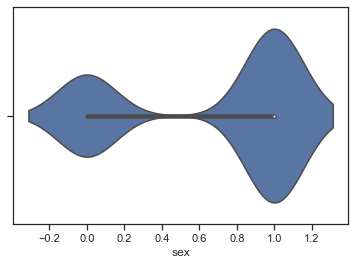

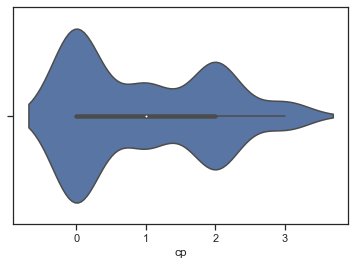

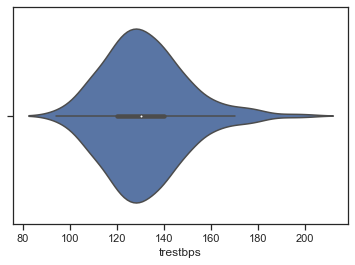

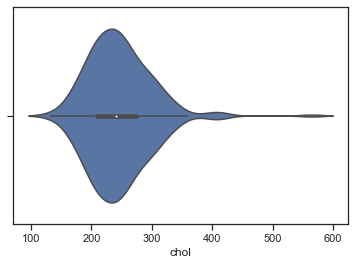

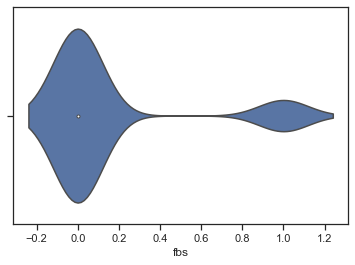

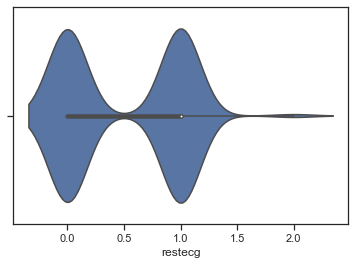

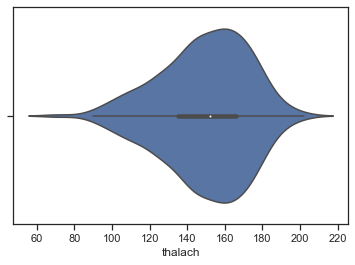

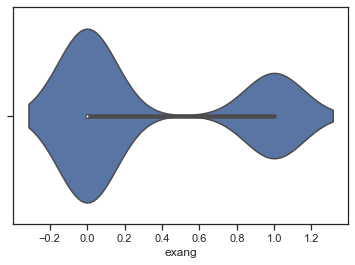

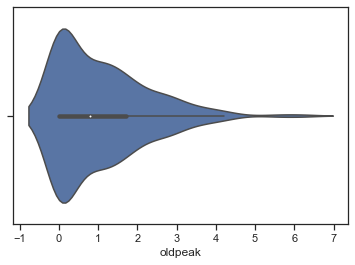

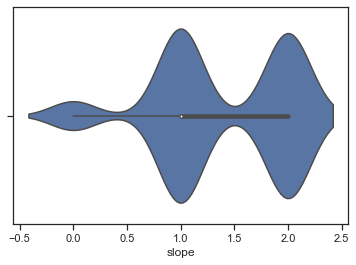

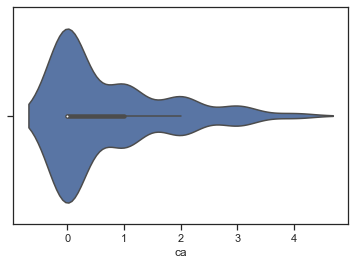

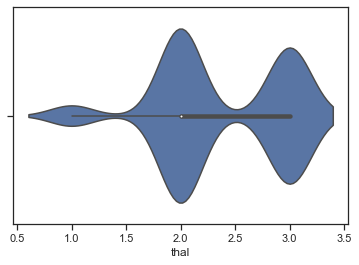

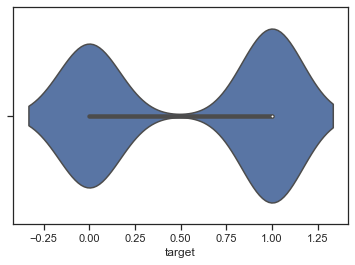

In [26]:
# Скрипичные диаграммы для числовых колонок
for col in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    sns.violinplot(x=train[col])
    plt.show()

### Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [27]:
train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Для построения моделей будем использовать все признаки.

Категориальные признаки отсутствуют, их кодирования не требуется. 

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Выполним масштабирование данных. Для этого необходимо объединить обучающую и тестовые выборки.

In [30]:
# Создадим вспомогательные колонки, 
# чтобы наборы данных можно было разделить.
train['dataset'] = 'TRAIN'
test['dataset'] = 'TEST'

In [49]:
# Колонки для объединения
join_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target','dataset']

In [50]:
data_all = pd.concat([train[join_cols], test[join_cols]])

In [51]:
# Проверим корректность объединения
assert data_all.shape[0] == train.shape[0]+test.shape[0]

In [52]:
data_all.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,dataset
0,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,TRAIN
1,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,TRAIN
2,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1,TRAIN
3,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1,TRAIN
4,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1,TRAIN


In [53]:
# Числовые колонки для масштабирования
scale_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [54]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_all[scale_cols])

In [55]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_all[new_col_name] = sc1_data[:,i]

In [56]:
data_all.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,trestbps_scaled,chol_scaled,fbs_scaled,restecg_scaled,thalach_scaled,exang_scaled,oldpeak_scaled,slope_scaled,ca_scaled,thal_scaled
0,58,1,0,114,318,0,2,140,0,4.4,...,0.188679,0.438356,0.0,1.0,0.526718,0.0,0.709677,0.0,0.75,0.333333
1,52,1,2,172,199,1,1,162,0,0.5,...,0.735849,0.166667,1.0,0.5,0.694656,0.0,0.080645,1.0,0.00,1.000000
2,53,1,0,142,226,0,0,111,1,0.0,...,0.452830,0.228311,0.0,0.0,0.305344,1.0,0.000000,1.0,0.00,1.000000
3,68,1,2,118,277,0,1,151,0,1.0,...,0.226415,0.344749,0.0,0.5,0.610687,0.0,0.161290,1.0,0.25,1.000000
4,62,1,2,130,231,0,1,146,0,1.8,...,0.339623,0.239726,0.0,0.5,0.572519,0.0,0.290323,0.5,0.75,1.000000


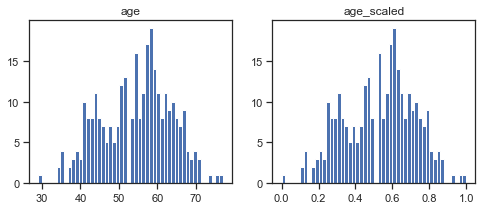

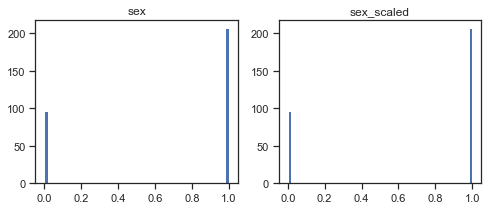

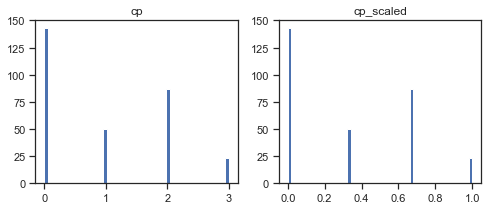

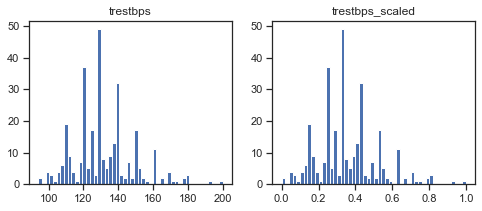

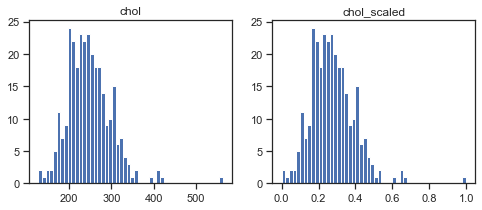

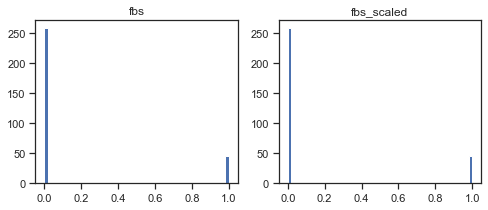

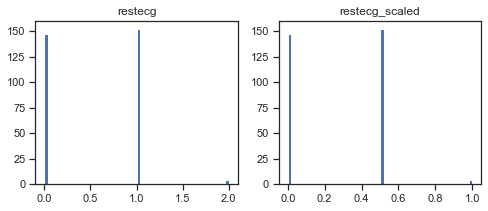

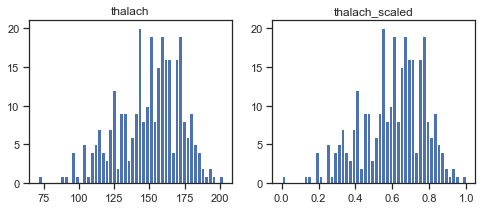

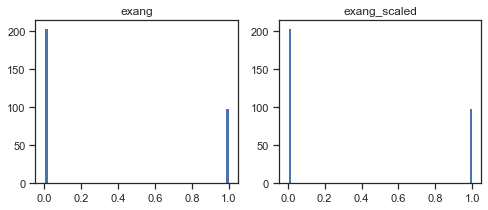

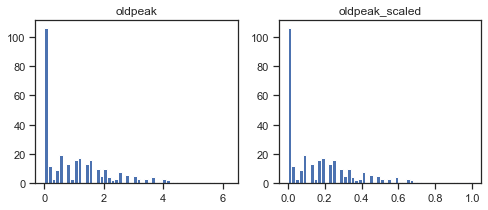

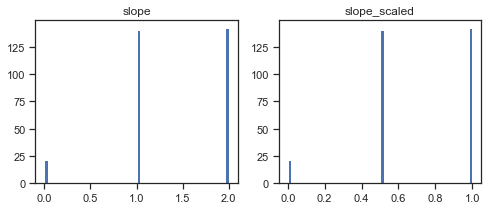

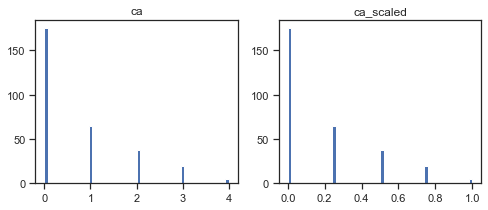

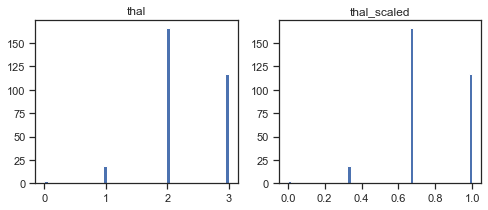

In [57]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_all[col], 50)
    ax[1].hist(data_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [58]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols + ['target']
corr_cols_1

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [59]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['target']
corr_cols_2

['age_scaled',
 'sex_scaled',
 'cp_scaled',
 'trestbps_scaled',
 'chol_scaled',
 'fbs_scaled',
 'restecg_scaled',
 'thalach_scaled',
 'exang_scaled',
 'oldpeak_scaled',
 'slope_scaled',
 'ca_scaled',
 'thal_scaled',
 'target']

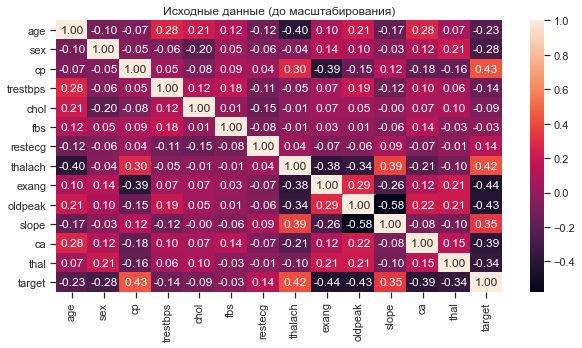

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_all[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()


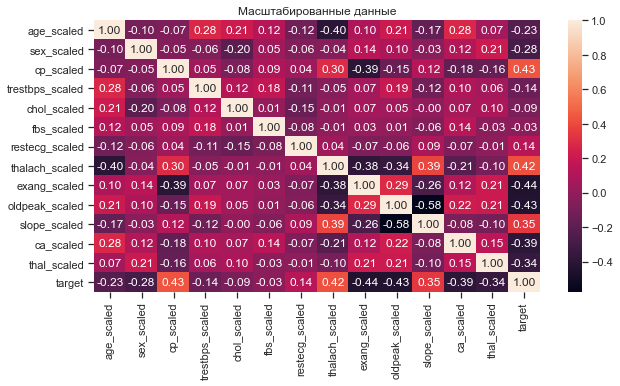

In [62]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_all[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

Корреляционные матрицы для исходных и масштабированных данных совпадают.

Целевой признак бинарной классификации "target" наиболее сильно коррелирует с "cp" (0.43), "thalach" (0.42) и "slope" (0.35), а также 'exang' (-0.44), 'oldpeak'(-0.43), 'ca'(-0.39), 'thal'(-0.39). Эти признаки обязательно следует оставить в модели классификации.

 На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

## Выбор метрик для последующей оценки качества моделей.
### В качестве метрик для решения задачи классификации будем использовать:
Метрики, формируемые на основе матрицы ошибок:

#### Метрика precision:
Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

precision=TPTP+FP
Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция precision_score.

#### Метрика recall (полнота):
recall=TPTP+FN
Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция recall_score.

#### Метрика F1-мера
Для того, чтобы объединить precision и recall в единую метрику используется Fβ-мера, которая вычисляется как среднее гармоническое от precision и recall:

Fβ=(1+β2)⋅precision⋅recallprecision+recall
где β определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при β=1:

F1=2⋅precision⋅recallprecision+recall
Для вычисления используется функция f1_score.

#### Метрика ROC AUC
Основана на вычислении следующих характеристик:

TPR=TPTP+FN - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

FPR=FPFP+TN - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

### Сохранение и визуализация метрик
Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [64]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.
Для задачи классификации будем использовать следующие модели:

Логистическая регрессия

Метод ближайших соседей

Машина опорных векторов

Решающее дерево

Случайный лес

Градиентный бустинг

### Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [83]:
# На основе масштабированных данных выделим 
# обучающую и тестовую выборки с помощью фильтра
train_data_all = data_all[data_all['dataset']=='TRAIN']
test_data_all = data_all[data_all['dataset']=='TEST']
train_data_all.shape, test_data_all.shape

((243, 28), (60, 28))

In [84]:
# Признаки для задачи классификации
task_clas_cols = ['cp', 'thalach', 
                  'slope','exang', 'oldpeak', 'ca', 'thal']

In [85]:
# Выборки для задачи классификации
clas_X_train = train_data_all[task_clas_cols]
clas_X_test = test_data_all[task_clas_cols]
clas_Y_train = train_data_all['target']
clas_Y_test = test_data_all['target']
clas_X_train.shape, clas_X_test.shape, clas_Y_train.shape, clas_Y_test.shape

((243, 7), (60, 7), (243,), (60,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

### Решение задачи классификации

In [103]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_10':KNeighborsClassifier(n_neighbors=10),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [87]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [73]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [74]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)
    # Предсказание значений
    Y_pred = model.predict(clas_X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(clas_X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(clas_Y_test.values, Y_pred)
    recall = recall_score(clas_Y_test.values, Y_pred)
    f1 = f1_score(clas_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(clas_Y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, clas_X_test, clas_Y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


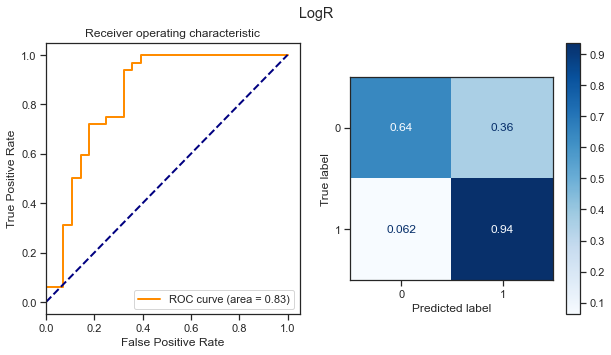

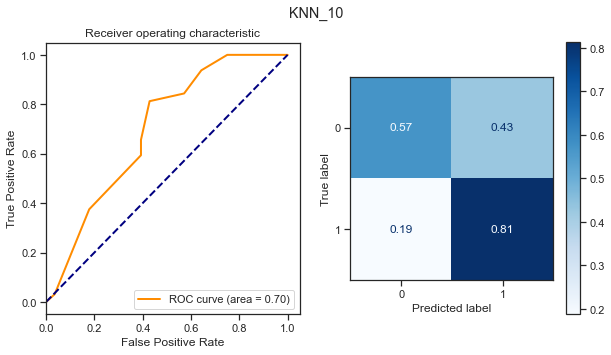

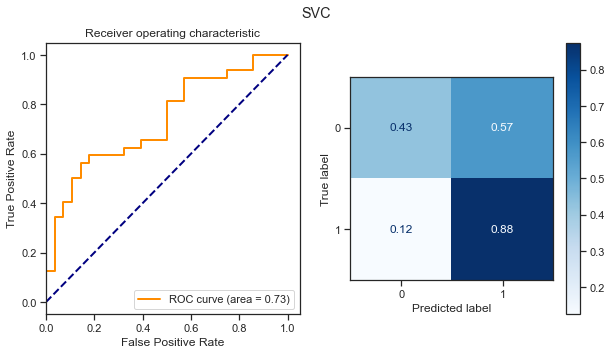

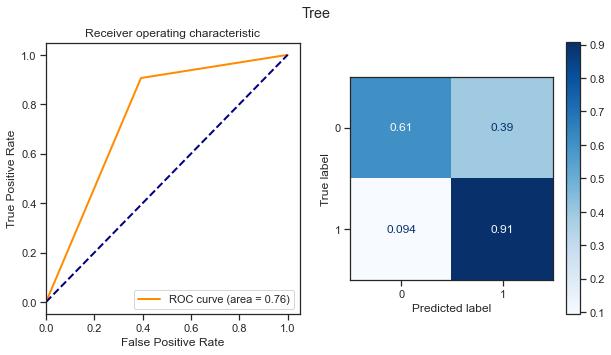

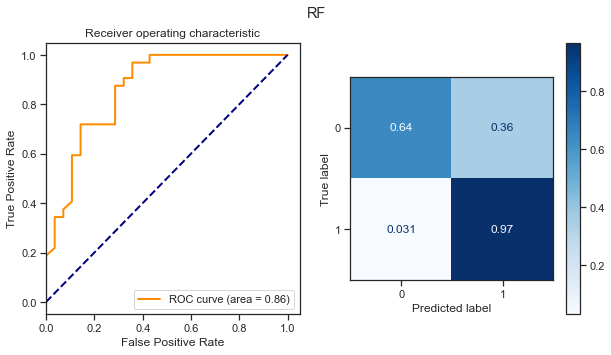

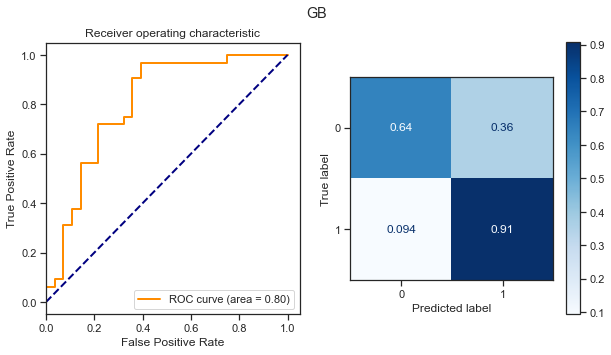

In [104]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

### Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [89]:
clas_X_train.shape

(243, 7)

In [92]:
n_range_list = list(range(0,50,2))
n_range_list[0] = 1

In [93]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
         34, 36, 38, 40, 42, 44, 46, 48])}]

In [95]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(clas_X_train, clas_Y_train)

Wall time: 740 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48])}],
             scoring='roc_auc')

In [96]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [97]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'4'

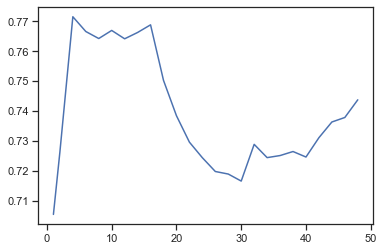

In [98]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [101]:
clas_models_grid = {'KNN_10':KNeighborsClassifier(n_neighbors=10), 
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

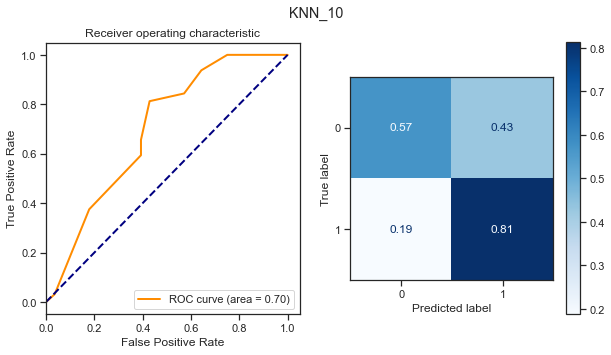

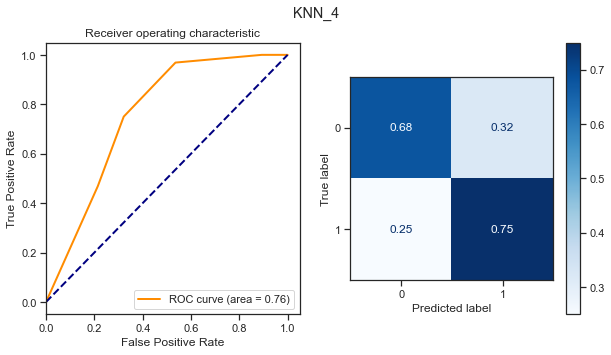

In [102]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)


### Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [105]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

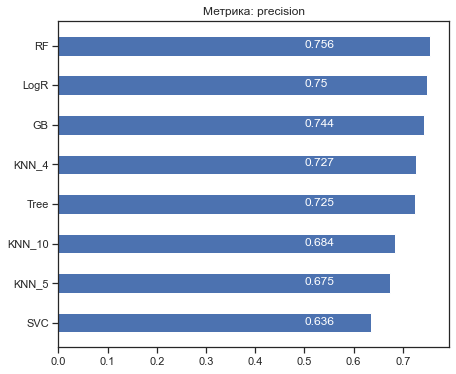

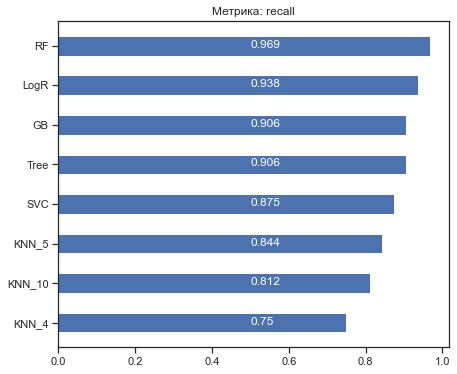

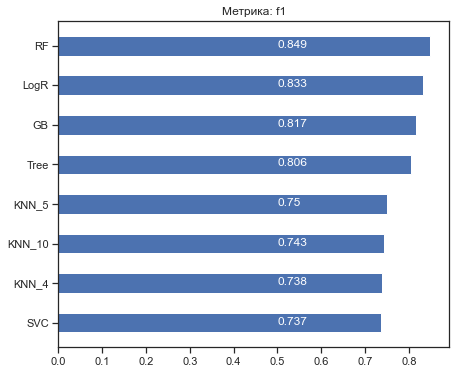

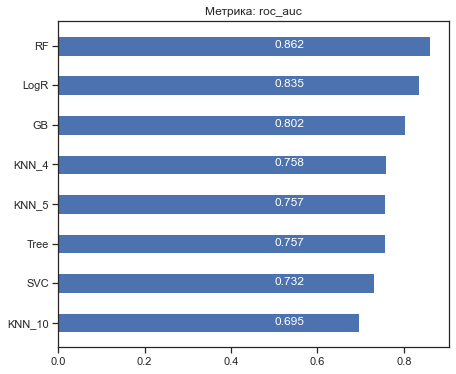

In [106]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

### Вывод: на основании трех метрик из четырех используемых, лучшей оказалась модель случайного леса